In [1]:
import time
import cv2
import os
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def dawOnMac():
    cv2.destroyAllWindows()
    for i in range (1,5):
        cv2.waitKey(1)

In [4]:
class BubbleCounter():

    def __init__(self):
        self.startTime = time.time()
        
        # self.images = []
        # folder = 'C:/Users/dlsxo/Desktop/bubble counter/sample00/'
        # for filename in os.listdir(folder):
        #     img = cv2.imread(os.path.join(folder, filename))
        #     if img is not None:
        #         self.images.append(img)


        self.vidcap = cv2.VideoCapture('./KakaoTalk_20220131_002306209.mp4')
        self.success, self.image = self.vidcap.read()
        
        self.contourList = []




    def main(self):
        count = 0
        while self.success:
            cv2.imwrite("./sample00/%06d.jpg" % count, self.image)     # save frame as JPEG file
            self.success, self.image = self.vidcap.read()
            print('Read a new frame: ', self.success)
            count += 1



    def printInfo(self):

        print(type(self.image))
        print(self.image.shape)




    def cropCircle(self):
        mask = np.zeros((1080, 1920), np.uint8)
        circle_img = cv2.circle(mask, (950, 500), radius=500, color=(255, 255, 255), thickness=-1)        
        masked_data = cv2.bitwise_and(self.image, self.image, mask=circle_img)
        
        while True:
            cv2.imshow('showImg', masked_data)

            if cv2.waitKey(1) & 0Xff == ord('q'):
                break
        
    
    def cropCircle(self, img):
        mask = np.zeros((1080, 1920), np.uint8)
        circle_img = cv2.circle(mask, (950, 500), radius=500, color=(255, 255, 255), thickness=-1)        
        masked_data = cv2.bitwise_and(img, img, mask=circle_img)
        return masked_data
        
    
    def getSubtract(self):
        mat1 = np.array(self.imageList[-1])
        mat2 = np.array(self.imageList[-2])

        # to gray image
        gmat1 = cv2.cvtColor(mat1, cv2.COLOR_BGR2GRAY)
        gmat2 = cv2.cvtColor(mat2, cv2.COLOR_BGR2GRAY)

        BD = cv2.subtract(gmat1, gmat2)

        self.BDList.append(BD)
        self.BDList = self.BDList[-self.BDLen:]

        self.BDMaxList.append(BD.max())
        self.BDMaxList = self.BDMaxList[-self.BDLen:]

        self.BDSList.append(np.std(BD))
        self.BDSList = self.BDSList[-self.BDSListLen:]




    def imgLoad(self):
        img1 = cv2.imread('C:/Users/dlsxo/Desktop/bubble counter/sample00/000000.jpg')
        img1 = self.cropCircle(img1)
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        

        img2 = cv2.imread('C:/Users/dlsxo/Desktop/bubble counter/sample00/000001.jpg')
        img2 = self.cropCircle(img2)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

        BD = cv2.subtract(img1, img2)

        while True:
            BDS = cv2.resize(BD, (960, 540)) #Resize image

            cv2.imshow('showImg', BDS)

            if cv2.waitKey(1) & 0Xff == ord('q'):
                break



    def imgLoad(self):
        img1 = cv2.imread('C:/Users/dlsxo/Desktop/bubble counter/sample00/000022.jpg')
        img1 = self.cropCircle(img1)
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        

        img2 = cv2.imread('C:/Users/dlsxo/Desktop/bubble counter/sample00/000023.jpg')
        img2 = self.cropCircle(img2)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

        BD = cv2.subtract(img1, img2)



        ret, img_binary = cv2.threshold(BD, 10, 255, 0)
        contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    
        for cnt in contours:
            cv2.drawContours(img2, [cnt], 0, (255, 0, 0), 2)  # blue


        while True:
            img2 = cv2.resize(img2, (960, 540)) #Resize image

            cv2.imshow('showImg', img2)

            if cv2.waitKey(1) & 0Xff == ord('q'):
                break



    def vPlay(self):        
        vidcap = cv2.VideoCapture('./KakaoTalk_20220131_002306209.mp4')
        success, image = vidcap.read()
        

        # video info
        print('Frame width:', int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)))
        print('Frame height:', int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
        print('Frame count:', int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)))
        fps = vidcap.get(cv2.CAP_PROP_FPS)
        print('FPS:', fps)


        count = 0
        while success:


            img1 = self.cropCircle(image)
            # img1 = image
            # img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


            success, image = vidcap.read()
            # print('Read a new frame: ', success)
            print(count)

            img2 = self.cropCircle(image) # cut img to circle
            # img2 = image
            # img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


            BD = cv2.subtract(img1, img2)

            BD = cv2.resize(BD, (960, 540)) #Resize image

            cv2.imshow('showImg', BD)

            if cv2.waitKey(1) & 0Xff == ord('q'):
                break


            time.sleep(0.5)
            count += 1




    def vPlay2(self):
        vidcap = cv2.VideoCapture('./KakaoTalk_20220131_002306209.mp4')
        success, image = vidcap.read()

        # video info
        print('Frame width:', int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)))
        print('Frame height:', int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
        print('Frame count:', int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)))
        fps = vidcap.get(cv2.CAP_PROP_FPS)
        print('FPS:', fps)

        self.count = 0
        while success:
            print(self.count)
            
            img1 = self.cropCircle(image)

            success, image = vidcap.read()
            img2 = self.cropCircle(image)

            BD = cv2.subtract(img1, img2)

            ret, img_binary = cv2.threshold(BD, 50, 255, 0)
            
            img_binary = cv2.cvtColor(img_binary, cv2.COLOR_BGR2GRAY)

            contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            print(contours)
            print(len(contours))
            
            self.contourList.append(contours)
            
            
#             rstimg = cv2.drawContours(img2, contours, -1, (0, 255, 0), 2)  # blue
            rstimg = img2

            if contours:
                for ll in contours:
                    mdfcontourList = [[i[0][0] for i in ll.tolist()],\
                                      [i[0][1] for i in ll.tolist()]]

                    print(max(mdfcontourList[0]), min(mdfcontourList[0]))
                    print(max(mdfcontourList[1]), min(mdfcontourList[1]))

                    pt1, pt2 = (max(mdfcontourList[0]), max(mdfcontourList[1])),\
                    (min(mdfcontourList[0]), min(mdfcontourList[1]))

                    rstimg = cv2.rectangle(rstimg, pt1, pt2, (255,0,0), 2)

            else:
                print('pass!')
            

            rstimg = cv2.resize(rstimg, (960, 540)) #Resize image

#             cv2.imshow('showRaw', BD)
            cv2.imshow('showImg', rstimg)
            
            
            if cv2.waitKey(1) & 0Xff == ord('q'):
                break
                
            time.sleep(0.5)
            self.count += 1

#         cv2.destroyAllWindows()




    def vPlay3(self):        
        vidcap = cv2.VideoCapture('./KakaoTalk_20220131_002306209.mp4')
        success, image = vidcap.read()
        

        # video info
        print('Frame width:', int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)))
        print('Frame height:', int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
        print('Frame count:', int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)))
        fps = vidcap.get(cv2.CAP_PROP_FPS)
        print('FPS:', fps)


        count = 0
        while success:


            img1 = self.cropCircle(image)
            # img1 = image
            # img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


            success, image = vidcap.read()
            # print('Read a new frame: ', success)
            print(count)

            img2 = self.cropCircle(image) # cut img to circle
            # img2 = image
            # img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

            
            self.BD = cv2.subtract(img1, img2)

            self.BD = cv2.resize(self.BD, (960, 540)) #Resize image
            
#             self.histBD = np.histogram(self.BD, bins=5)
            
#             cv2.putText(img=self.BD, text=str(count), org=(50, 500), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(0, 0, 255),thickness=1)
            
            fig = plt.figure(figsize=(16,8))
#             print(self.BD.shape)
#             print(type(self.BD))
            histBD = np.reshape(bc.BD, -1)

            histBD = np.delete(histBD, np.where(histBD == 0))        
#             print(np.percentile(histBD, 95))
            histBD = np.delete(histBD, np.where(histBD < np.percentile(histBD, 95)))



#             plt.hist(histBD, bins=np.linspace(0, 255, num=50))

            print(np.unique(histBD))            
            print(sum(histBD)/len(histBD))
            

            plt.imshow(255 - self.BD)
            plt.show()

#             cv2.imshow('showImg', self.BD)




            if cv2.waitKey(1) & 0Xff == ord('q'):
                break

            time.sleep(0.5)
            count += 1


Frame width: 1920
Frame height: 1080
Frame count: 2219
FPS: 29.99053926206244
0
[ 2  3  4  5  6  7  8  9 10 11 12 14 16 18 19 29 30 32]
2.5526219288595526


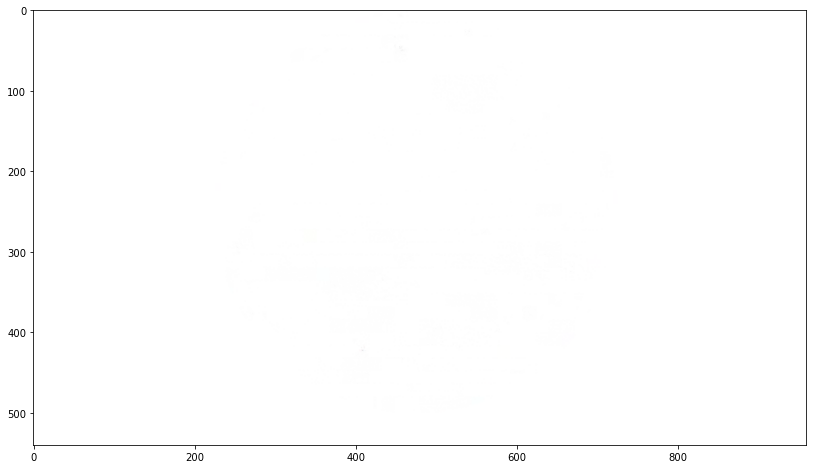

1
[ 2  3  4  5  6  7  8  9 10 11 13 14 18 27]
2.3451944240645632


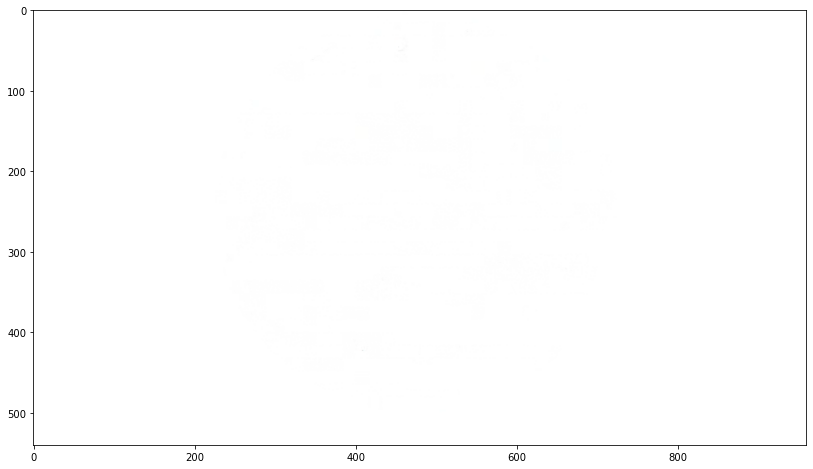

2
[ 2  3  4  5  6  7  8  9 11 12 16 21 22 23 24]
2.9794871794871796


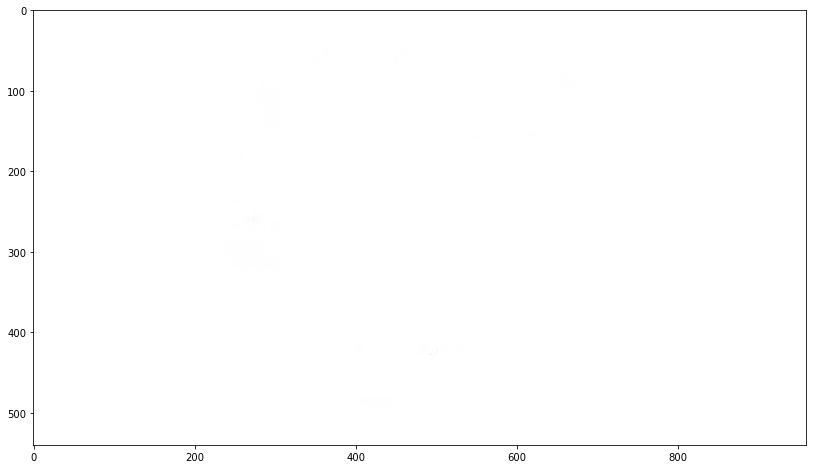

3
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 23 24 25 26 29 30
 32 33 36 40 41 44 47 51 53]
2.7333171560300897


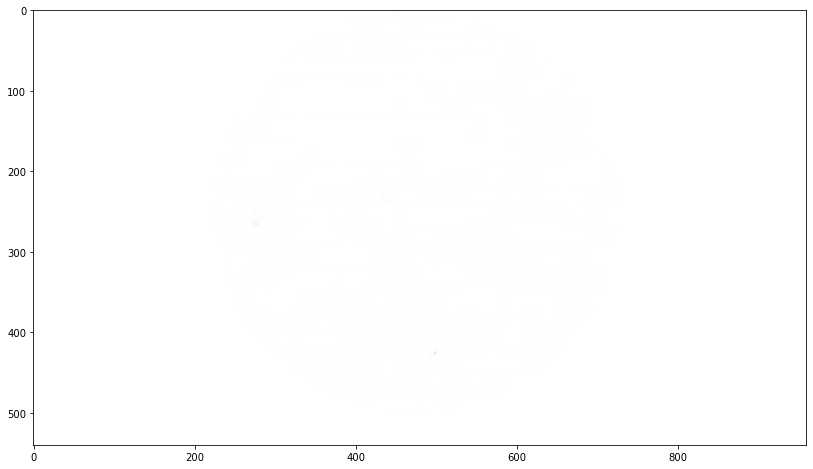

4
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 27
 28 29 30 31 32 34 36 38 41 43 56 58]
2.6238544752980086


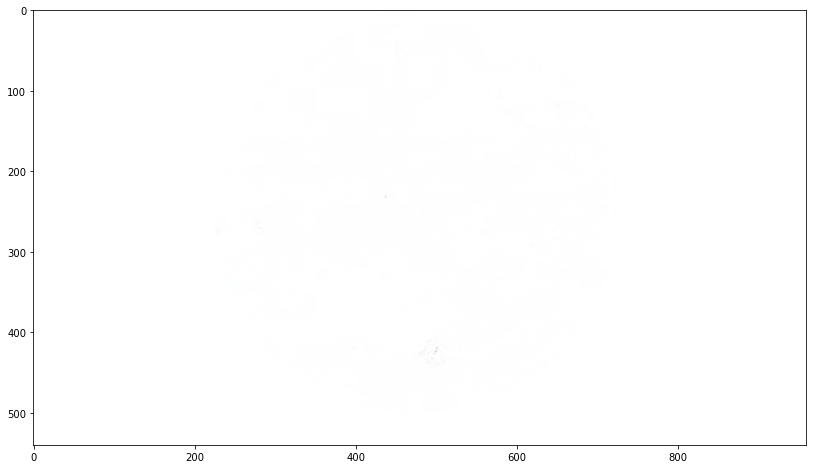

5
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 21 22 24 28 32 36 43 44 46]
2.5672066549912436


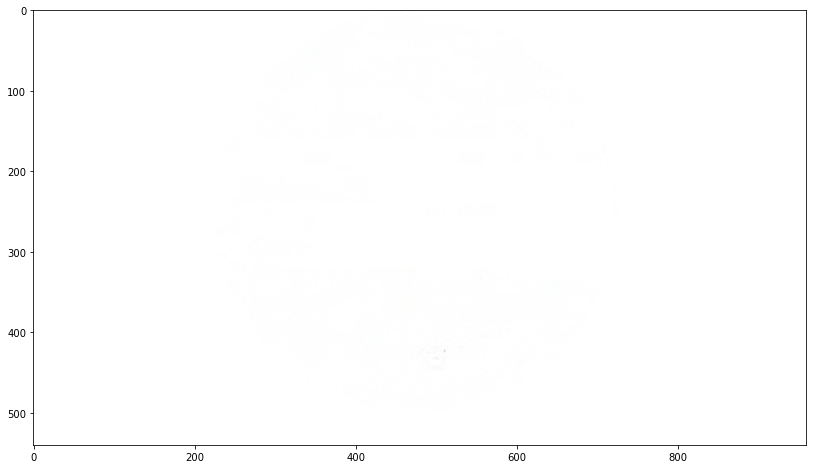

6
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 20]
2.702891326021934


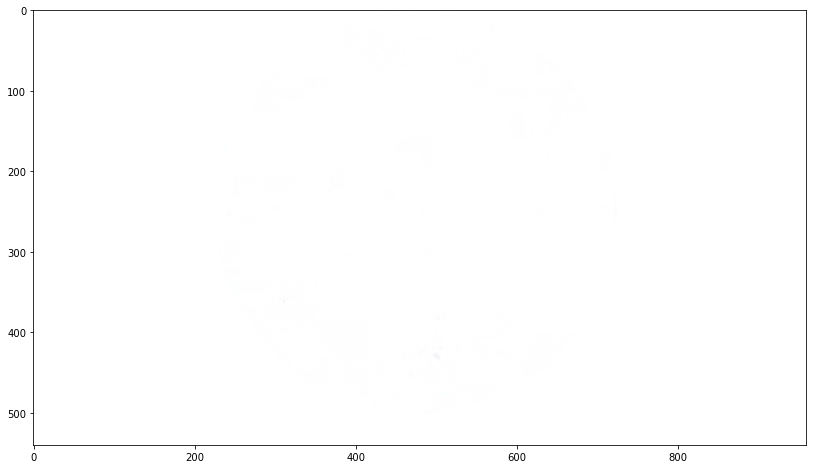

7
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 35 36 37 39 40 41 42 43 44]
2.7768046334228


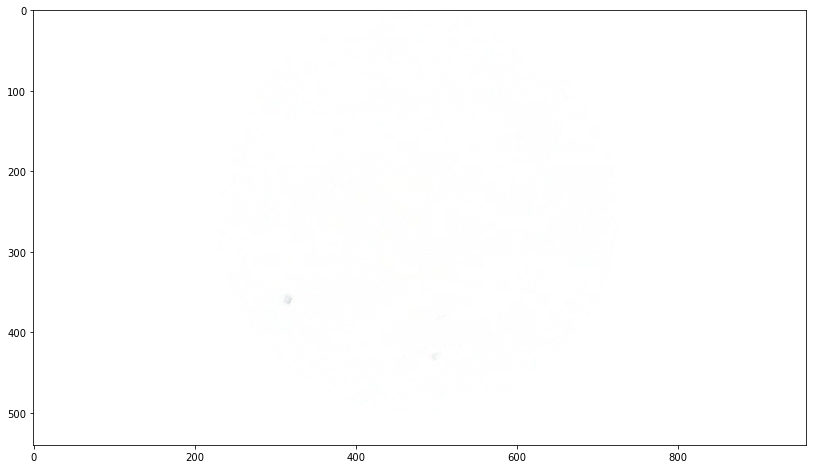

8
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 46 47]
2.918794586305754


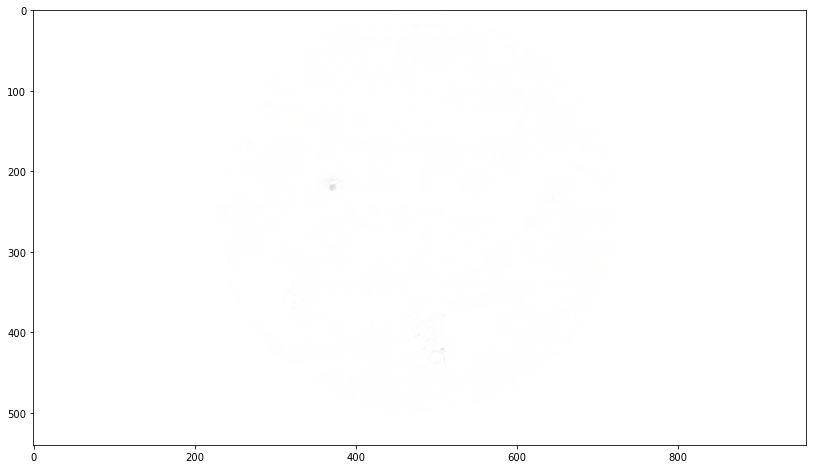

9
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 40]
4.555772230889236


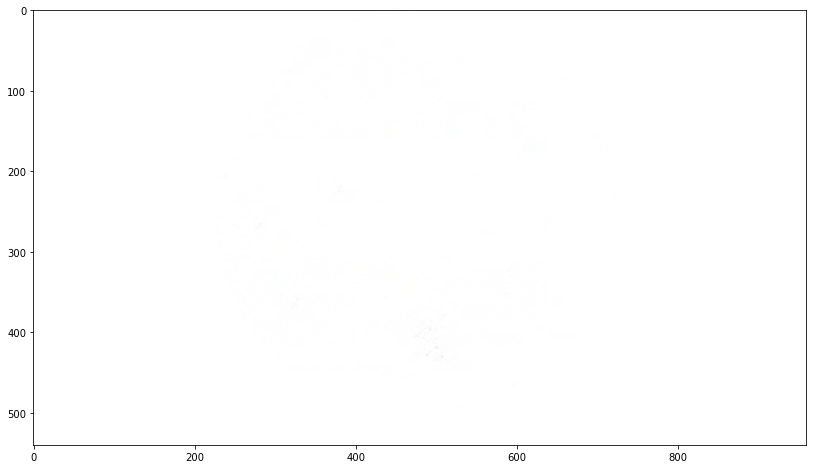

10
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 34 35 36 37 39 49 50 54]
6.532004599463396


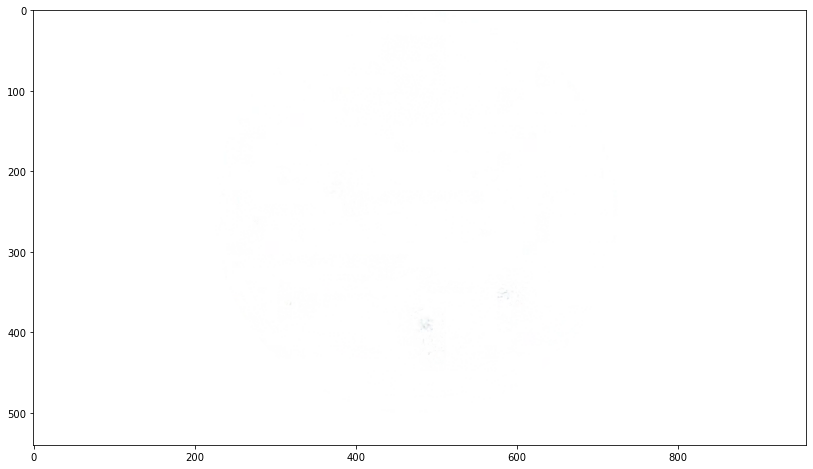

11
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 33 70]
2.6689098250336474


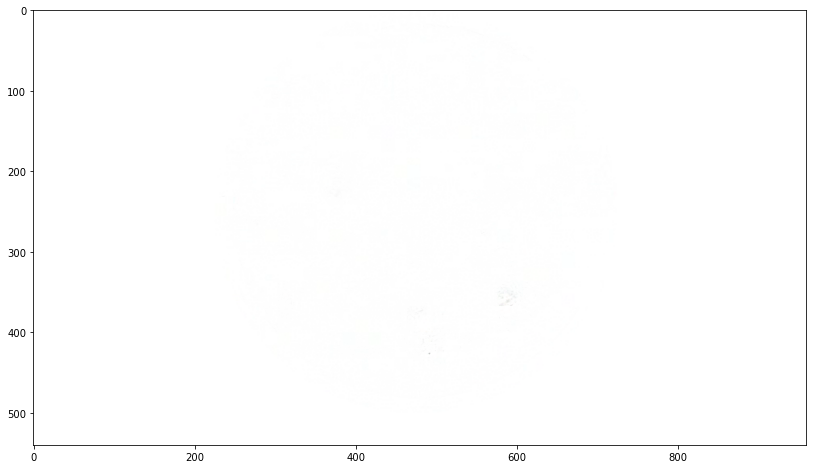

12
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 37 38 39 40 41 44]
3.846824408468244


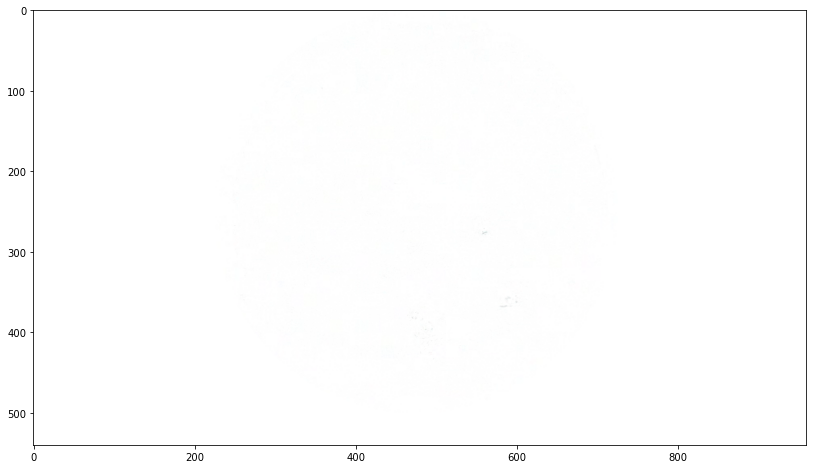

13
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 23 26 28 32]
2.602962962962963


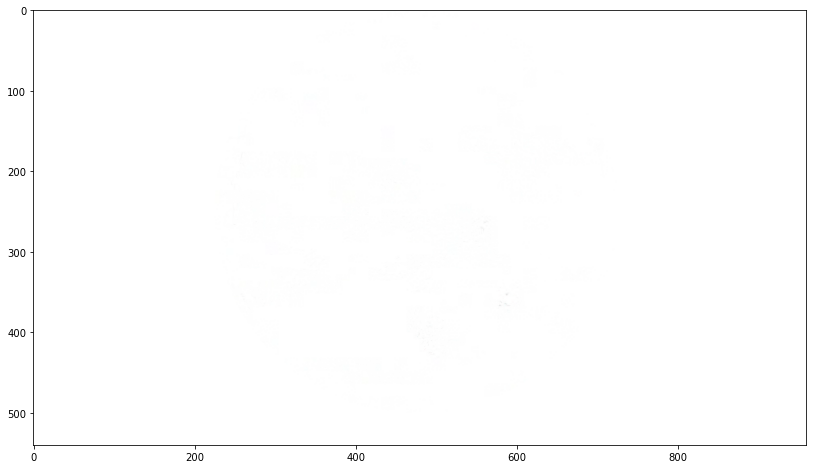

14
[ 2  3  4  5  6  7  8  9 10 11 12 13 15 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 34 36 38 40]
2.5183498526654167


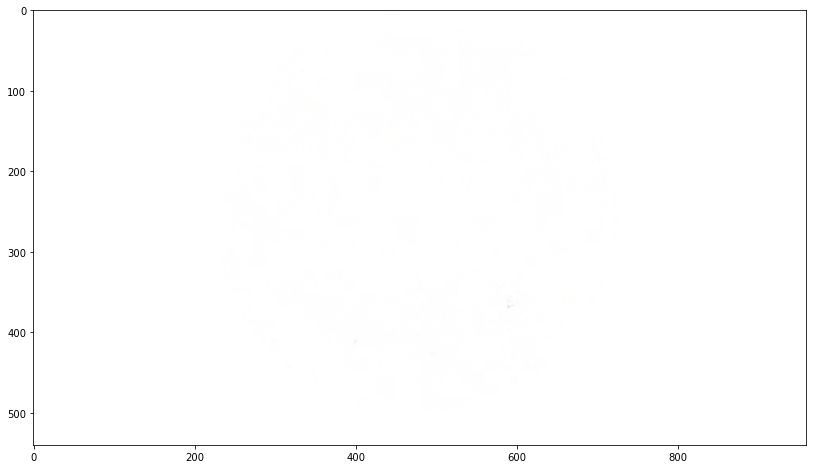

15
[ 2  3  4  5  6  7  8  9 10 11 15 16 17 18 20]
2.2955121616992122


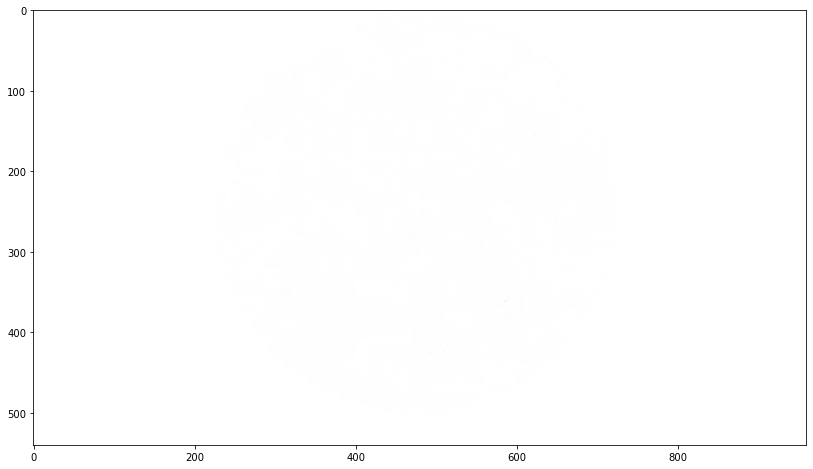

KeyboardInterrupt: 

In [5]:
# if __name__=='__main__':

bc = BubbleCounter()

# bc.main()

# bc.printInfo()
# bc.cropCircle()

# bc.imgLoad()

# bc.vPlay()
# bc.vPlay2()
bc.vPlay3()
# cv2.destroyAllWindows()
dawOnMac()




In [ ]:
dawOnMac()

In [ ]:
# for ii in range(bc.count):
#     try:
#         mdfcontourList = [[i[0][0] for i in bc.contourList[ii][0].tolist()],\
#                           [i[0][1] for i in bc.contourList[ii][0].tolist()]]
        
#         print(max(mdfcontourList[0]), min(mdfcontourList[0]))
#         print(max(mdfcontourList[1]), min(mdfcontourList[1]))
#     except:
#         print('pass!')
#         pass

In [ ]:
bc.BD.shape

In [ ]:
np.reshape(bc.BD, -1).shape

In [ ]:
np.unique(np.reshape(bc.BD, -1))

In [ ]:
np.percentile(np.linspace(0, 255, 100), 99)